

# importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# reading the csv file

In [2]:
data=pd.read_csv(r"C:\Users\ameya\Downloads\loan_amount.csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# missing values

In [6]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
data.isnull().sum()*100/len(data)
#missing value percentage

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [8]:
data=data.drop('Loan_ID', axis=1)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# filling the missing values

In [9]:
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].mode()[0],inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)
data.isnull().sum()*100/len(data)

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [10]:
data.sample(6)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
449,Male,No,1,Not Graduate,Yes,2769,1542.0,190.0,360.0,1.0,Semiurban,N
456,Male,Yes,0,Graduate,No,4301,0.0,118.0,360.0,1.0,Urban,Y
151,Male,Yes,0,Graduate,Yes,2577,3750.0,152.0,360.0,1.0,Rural,Y
319,Male,Yes,1,Graduate,Yes,10000,0.0,155.0,360.0,1.0,Rural,N
530,Male,Yes,0,Graduate,No,1025,5500.0,216.0,360.0,1.0,Rural,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# replacing the values

In [11]:
data['Dependents'].replace(to_replace="3+",value="4",inplace=True)
data.sample(7)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
367,Male,No,0,Graduate,No,5124,0.0,124.0,360.0,0.0,Rural,N
599,Male,Yes,2,Graduate,No,5780,0.0,192.0,360.0,1.0,Urban,Y
349,Male,Yes,0,Graduate,No,2625,6250.0,187.0,360.0,1.0,Rural,Y
30,Male,Yes,1,Graduate,No,4166,3369.0,201.0,360.0,1.0,Urban,N
544,Female,Yes,0,Not Graduate,No,3017,663.0,102.0,360.0,1.0,Semiurban,Y
160,Male,Yes,0,Not Graduate,No,1863,1041.0,98.0,360.0,1.0,Semiurban,Y
307,Female,No,0,Graduate,No,2400,1863.0,104.0,360.0,0.0,Urban,N


In [12]:
cols=['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']

In [13]:
data.columns=cols
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,4,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


<Axes: >

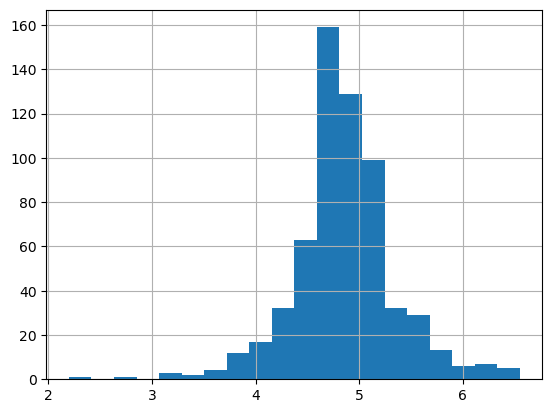

In [14]:
data['Loan_Amount_Term']=np.log(data['LoanAmount'])
data['Loan_Amount_Term'].hist(bins=20)

<Axes: >

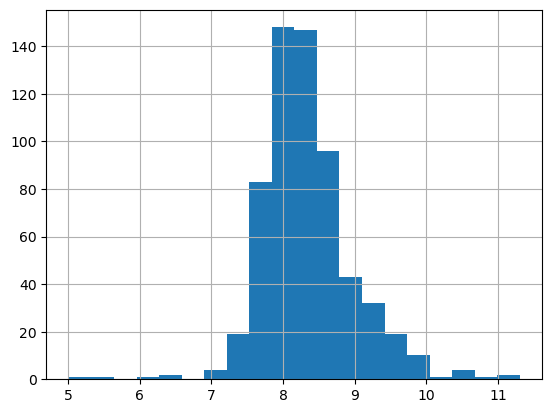

In [15]:
data['CoapplicantIncome']=np.log(data['ApplicantIncome'])
data['CoapplicantIncome'].hist(bins=20)

In [16]:
data['Dependents'].unique()

array(['0', '1', '2', '4'], dtype=object)

In [17]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [18]:
data['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [19]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [20]:
data['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [21]:
data['Credit_History'].unique()

array([1., 0.])

In [22]:
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [23]:
data['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

<Axes: xlabel='Gender', ylabel='count'>

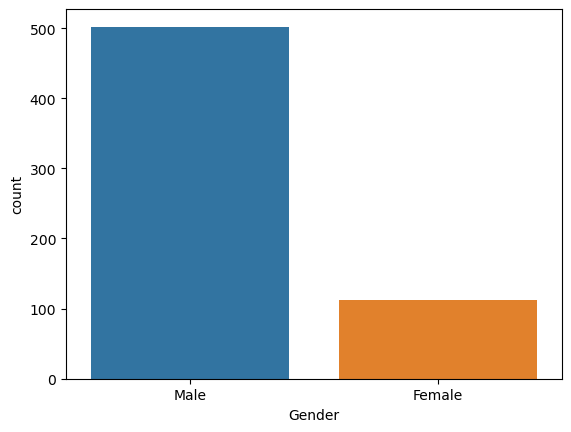

In [24]:
c=data['Gender'].value_counts()
sns.countplot(x='Gender',data=data)

<Axes: xlabel='Married', ylabel='count'>

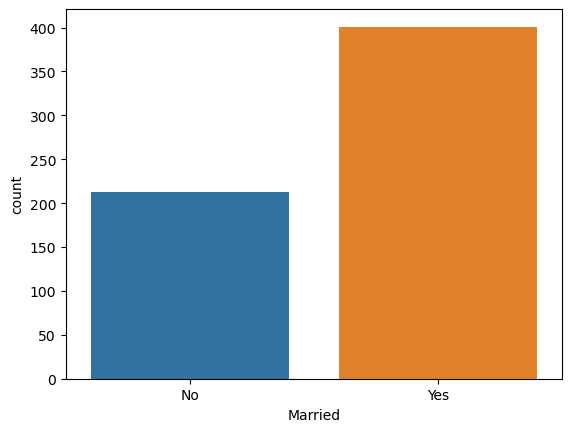

In [25]:
c=data['Married'].value_counts()
sns.countplot(x='Married',data=data)

<Axes: xlabel='Property_Area', ylabel='count'>

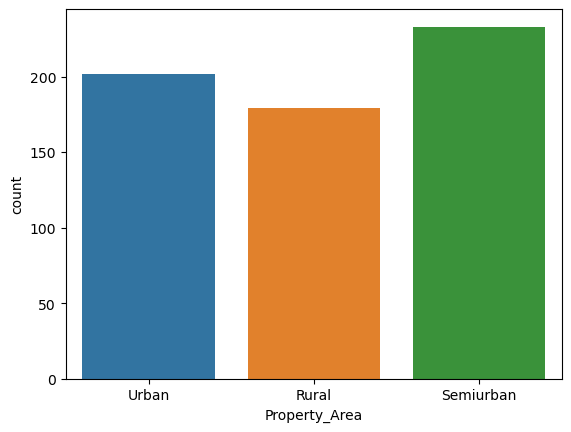

In [26]:
c=data['Property_Area'].value_counts()
sns.countplot(x='Property_Area',data=data)

# adding numerical values using labelencoder

In [27]:
le=LabelEncoder()

In [28]:
data['Gender']=le.fit_transform(data['Gender'])
data['Married']=le.fit_transform(data['Married'])
data['Education']=le.fit_transform(data['Education'])
data['Self_Employed']=le.fit_transform(data['Self_Employed'])
data['Property_Area']=le.fit_transform(data['Property_Area'])
data['Loan_Status']=le.fit_transform(data['Loan_Status'])


In [29]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,8.674026,120.0,4.787492,1.0,2,1
1,1,1,1,0,0,4583,8.430109,128.0,4.852030,1.0,0,0
2,1,1,0,0,1,3000,8.006368,66.0,4.189655,1.0,2,1
3,1,1,0,1,0,2583,7.856707,120.0,4.787492,1.0,2,1
4,1,0,0,0,0,6000,8.699515,141.0,4.948760,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,7.972466,71.0,4.262680,1.0,0,1
610,1,1,4,0,0,4106,8.320205,40.0,3.688879,1.0,0,1
611,1,1,1,0,0,8072,8.996157,253.0,5.533389,1.0,2,1
612,1,1,2,0,0,7583,8.933664,187.0,5.231109,1.0,2,1


# giving values to x and y

In [30]:
x=data.drop('Loan_Status',axis=1)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,8.674026,120.0,4.787492,1.0,2
1,1,1,1,0,0,4583,8.430109,128.0,4.852030,1.0,0
2,1,1,0,0,1,3000,8.006368,66.0,4.189655,1.0,2
3,1,1,0,1,0,2583,7.856707,120.0,4.787492,1.0,2
4,1,0,0,0,0,6000,8.699515,141.0,4.948760,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,7.972466,71.0,4.262680,1.0,0
610,1,1,4,0,0,4106,8.320205,40.0,3.688879,1.0,0
611,1,1,1,0,0,8072,8.996157,253.0,5.533389,1.0,2
612,1,1,2,0,0,7583,8.933664,187.0,5.231109,1.0,2


In [31]:
y=data['Loan_Status']
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

# scaleing the datas using standard scaler

In [32]:
c=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

In [33]:
scale=StandardScaler() #This object will be used to scale your data.

x[c]=scale.fit_transform(x[c])

# train,test the model

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)
# 10% of the data will be used for testing, and the remaining 90% will be used for training.
x.shape,x_train.shape,x_test.shape

((614, 11), (552, 11), (62, 11))

# support vector machine(algorithm)

In [35]:
svm=SVC()
svm.fit(x_train,y_train)


SVC()

# accuracy on training and testing

In [36]:
#accuracy score on training data
x_train_prediction=svm.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)
print("accuracy on training data:",training_data_accuracy)

accuracy on training data: 0.8079710144927537


In [37]:
x_test_prediction=svm.predict(x_test)
testing_data_accuracy=accuracy_score(x_test_prediction,y_test)
print("accuracy on testing data:",testing_data_accuracy)

accuracy on testing data: 0.8548387096774194


# save the model

In [38]:
import pickle
file = 'loan_model.pkl'
pickle.dump(svm,open(file, 'wb'))

In [39]:

x_new = x_test.iloc[].values.reshape(1, -1)

prediction=svm.predict(x_new)
print(prediction)

if prediction==0:
    print("loan not approved")
else:
    print("loan approved")

[0]
loan not approved


C:\Users\ameya\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
